# Outline for Discussion Today
1. Gaussian Mixture Model (GMM) & EM Algorithm
  
  http://bengio.abracadoudou.com/lectures/gmm.pdf
  
  http://sites.northwestern.edu/msia/2016/12/08/k-means-shouldnt-be-our-only-choice/ <br /> <br />
2. Model Persistance http://scikit-learn.org/stable/modules/model_persistence.html

# Gaussian Mixture Model (GMM) & EM Algorithm

## KMeans VS GMM:

### Recap for KMeans
Objective function:

$K$: # of clusters

$N$: # of data points

$$J=\displaystyle\sum_{n=1}^N\sum_{k=1}^K r_{nk} ||\mathbf{x}_n - \mathbf{\mu}_k||^2$$

\begin{align*}
r_{nk} = \begin{cases}
1, & \text{if } \vec{x}_n \text{ is assigned to cluster } k \\
0, & \text{otherwise}
\end{cases}, \quad n=1,\dots,N \quad k=1,\dots,K
\end{align*}

Initialization: randomly pick $\mathbf{\mu}_k$'s

Two phases:

1. Update $r_{nk}$'s to minimize $J$, while keeping $\mathbf{\mu}_k$'s fixed
2. Update $\mathbf{\mu}_k$'s to minimize $J$, while keeping $r_{nk}$'s fixed

### Recap for Bayes' theorem

$$P(A \;|\; B) = \frac{P(B \;|\; A) P(A)}{P(B)}$$

Fixing $P(B)$,

$$\begin{array}{rclcl}
P(A \;|\; B) & \propto & P(B \;|\; A) & \times & P(A)\\
\text{Posterior} & \propto & \text{Likelihood} & \times & \text{Prior}
\end{array}
$$

Example: $A = \textbf{Fire}$, $B = \textbf{Alarm}$, $P(A) = 10^{-5}$, $P(B \;|\; A) = 0.999$
$$P(A \;|\; B) = \frac{P(B \;|\; A) P(A)}{P(B)} = \frac{0.999 \times 10^{-5}}{P(B)}$$
Since $P(B)$ is not small, people don't panic.

### Probabilistic interpretation of KMeans

The intuition behind KMeans:

1. The data points distribution consists of several clusters.
2. The farther a point from the center of a cluster, the less probable that it belongs to that cluster.

#### A generative model: Gaussian clusters with same isotropic covariances

##### Multidimensional Gaussian distribution

$$\mathcal{N}(\mathbf{x} \;|\; \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{2\pi}^{m} |\Sigma|^{1/2}}\exp{(-\frac{1}{2} (\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1} (\mathbf{x}-\mathbf{\mu}))}$$

$\mathbf{x} = [x_1, \dots, x_m]^T \in \mathbb{R}^m$. $\Sigma$ is the covariance matrix of $\mathbf{x}$. $\mathbf{\mu}$ is the mean of $\mathbf{x}$.

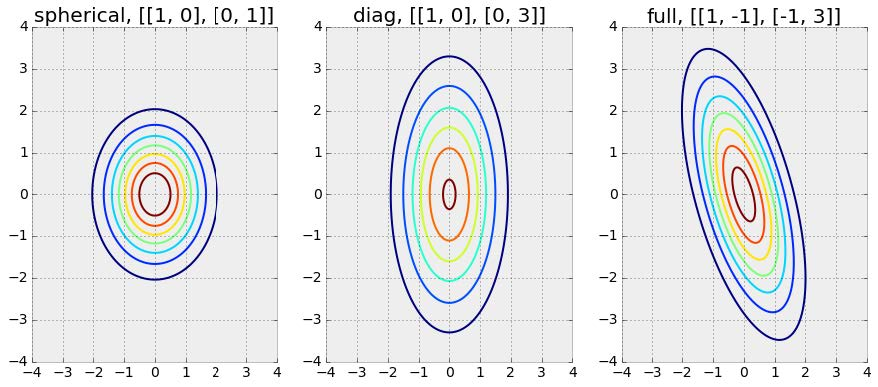
credit: http://sites.northwestern.edu/msia/2016/12/08/k-means-shouldnt-be-our-only-choice/

##### The generative model for KMeans

$$p(\mathrm{x}_n \;|\; r_{nk}=1) = \mathcal{N}(\mathrm{x} \;|\; \mathrm{\mu}_k, \Sigma),
\quad \text{ fix } \pi_k \equiv p(r_{nk} = 1) = \frac{1}{K}, \Sigma = \mathbf{I} \qquad \forall n$$

1. Given $\mathrm{\mu}_k$'s, for a data point $\mathrm{x}_n$, which cluster does it most likely to belong to?

  $$p(r_{nk} = 1 \;|\; \mathrm{x}_n; \mathrm{\mu}_k) = \frac{p(\mathrm{x}_n \;|\; r_{n,k} = 1; \mathrm{\mu}_k) p(r_{nk} = 1)}{\sum_{k'}p(\mathrm{x}_n \;|\; r_{nk'} = 1; \mathrm{\mu}_{k'}) p(r_{nk'} = 1)} = \frac{p(\mathrm{x}_n \;|\; r_{nk} = 1; \mathrm{\mu}_k) \frac{1}{K}}{\sum_{k'}p(\mathrm{x}_n \;|\; r_{nk'} = 1; \mathrm{\mu}_{k'}) \frac{1}{K}}$$

  $$k = \mathop{\rm arg\,max}\limits_{k} p(r_k = 1 \;|\; \mathrm{x}) \Rightarrow \text{Choose the closest cluster!}$$

2. Having $\mathrm{x}_n$'s and $r_{nk}$'s, what $\mathrm{\mu}$ should we choose?

  $$p(\{\mathrm{x}_n\}_{n=1}^N, \{\mathrm{r}_n\}_{n=1}^N \;\lvert\; \{\mathrm{\mu}_k\}_{k=1}^K) = \prod_{n=1}^N p(\mathrm{r}_n) p(\mathrm{x}_n \;\rvert\; \mathrm{\mu}_k, r_{nk}=1)$$
  
  max likelihood choice of $\mathrm{\mu}_k$ is just the mean of the data points that belong to cluster $k$: $$\frac{1}{\sum_n r_{nk}}\sum_n r_{nk}\mathrm{x}_n$$

And KMeans algorithm performs the two steps iteratively, until convergence.

### Gaussian Mixture Model (GMM)

Why not use different $\Sigma_k$ and $\pi_k$ for clusters?

In this way, we can handle **anisotropic** clusters.

In this case, $$p(r_{nk} = 1 \;|\; \mathrm{x}_n; \mathrm{\mu}_k, \Sigma_k, \pi_k) = \frac{p(\mathrm{x}_n \;|\; r_{nk} = 1; \mathrm{\mu}_k, \Sigma_k) \pi_k}{\sum_{k'}p(\mathrm{x}_n \;|\; r_{nk'} = 1; \mathrm{\mu}_{k'}, \Sigma_{k'}) \pi_{k'}}$$

After finding the estimators for $r_{nk}$'s by the *a posteriori* distribution above, the update rules for the parameters that maximize the likelihood $p(\{\mathrm{x}_n\}_{n=1}^N, \{\mathrm{r}_n\}_{n=1}^N \;\lvert\; \{\mathrm{\mu}_k\}_{k=1}^K, \{\pi_k\}_{k=1}^K, \{\Sigma_k\}_{k=1}^K)$:

$$\pi_k = \frac{\sum_n r_{nk}}{\sum_{n,k} r_{nk} = N}$$
$$\mathrm{\mu}_k = \frac{1}{\sum_n r_{nk}}\sum_n r_{nk}\mathrm{x}_n$$
$$\Sigma_k = \frac{1}{\sum_n r_{nk}}\sum_n r_{nk}(\mathrm{x}_n-\mathrm{\mu}_k)(\mathrm{x}_n-\mathrm{\mu}_k)^T$$

Further, we can use the so-called "soft assignment": substitute the binary $r_{nk}$ in the above update rules with a probability that $r_{nk}=1$: $\gamma_{nk} = p(r_{nk}=1 \;|\; \mathrm{x}; \mathrm{\mu}_k, \Sigma_k, \pi_k)$. This is essentially explaining each data points with a mixture of multiple Gaussian distributions.

It can be shown that by this we are actually maximizing the likelihood $p(\{\mathrm{x}_n\}_{n=1}^N \;\lvert\; \{\mathrm{\mu}_k\}_{k=1}^K, \{\pi_k\}_{k=1}^K, \{\Sigma_k\}_{k=1}^K)$ with $\gamma_{nk}$'s being calculated from the un-updated parameters. (See Chapter 9.2-9.3 in *Christopher M. Bishop. 2006. Pattern Recognition and Machine Learning. Springer*). Now the update rules become:

$$\pi_k = \frac{\sum_n \gamma_{nk}}{\sum_{n,k} \gamma_{nk} = N}$$
$$\mathrm{\mu}_k = \frac{1}{\sum_n \gamma_{nk}}\sum_n \gamma_{nk}\mathrm{x}_n$$
$$\Sigma_k = \frac{1}{\sum_n \gamma_{nk}}\sum_n \gamma_{nk}(\mathrm{x}_n-\mathrm{\mu}_k)(\mathrm{x}_n-\mathrm{\mu}_k)^T$$

<!--1. Assign each data to one cluster VS probability
    If data overlaps, how to keep uncertainty?
2. Use Eucliean distance Vs Generative model
    Cluster has non unit variance?-->

## Expectation maximization (EM) algorithm
<!--1. What is GMM model?
2. What are the hidden variables, why are they? 
3. What are the steps for EM?
4. How to calculate/update parameters(weights, mean, variance)-->
In the optimization process for GMM described above, we still have two phases like KMeans:

1. Update the posterior distribution of the hidden variable $r_{nk}$ using the current values of the parameters $\pi_k$, $\mathrm{\mu}_k$, $\Sigma_k$.
2. Update the parameters $\pi_k$, $\mathrm{\mu}_k$, $\Sigma_k$ using the posterior

In fact, this process is a member of a general optimization algorithm called **Expectation Maximization (EM) Algorithm**.

More generally, let's say we have a model having parameters denoted as $\mathbf{\theta}$, observed variables denoted as $\mathrm{X}$, and latent (hidden) variables denoted as $\mathrm{Z}$, and the joint distribution of $\mathrm{X}$ and $\mathrm{Z}$ is $p(\mathrm{X}, \mathrm{Z} \;|\; \mathbf{\theta})$.

Our goal is to maximize a likelihood function $p(\mathrm{X} \;|\; \mathbf{\theta})$ w.r.t. $\mathbf{\theta}$. In many cases there is not a closed form equation for the max-likelihood $\hat{\mathbf{\theta}}$, or calculating $\hat{\mathbf{\theta}}$ is computationally expensive. However, calculating max-likelihood $\mathbf{\theta}$ that maximizes $p(\mathrm{X}, \mathrm{Z} \;|\; \mathbf{\theta})$ is usually much easier. This is the case where EM algorithm is useful.

### E Step
The step 1 is called the expectation step (E-step), where we evaluate the posterior distribution of the hidden variable with the "old" parameters, $p(\mathrm{Z} \;|\; \mathrm{X}, \mathbf{\theta}^{(old)})$.

### M Step
The step 2 is called the maximization step (M-step), where we update the parameters by
\begin{align*}\mathbf{\theta}^{(new)} & = \mathop{\rm arg\,max}\limits_{\mathbf{\theta}} Q(\mathbf{\theta};\mathbf{\theta}^{(old)})\\
Q(\mathbf{\theta};\mathbf{\theta}^{(old)}) & = \sum_{\mathrm{Z}} p(\mathrm{Z} \;|\; \mathrm{X}, \mathbf{\theta}^{(old)}) \ln(p(\mathrm{X}, \mathrm{Z} \;|\; \mathbf{\theta}))\end{align*}

### Intuition

It can be shown that $$\ln\big(p(\mathrm{X} \;|\; \mathbf{\theta})\big) \ge Q(\mathbf{\theta};\mathbf{\theta}^{(t)}) + C, \text{ with equality at } \mathbf{\theta} = \mathbf{\theta}^{(t)}$$

Then
\begin{align*}
\ln\big(p(\mathrm{X} \;|\; \mathbf{\theta}^{(t+1)})\big) & \ge Q(\mathbf{\theta}^{(t+1)};\mathbf{\theta}^{(t)}) + C \\
& \ge Q(\mathbf{\theta}^{(t)};\mathbf{\theta}^{(t)}) + C = \ln\big(p(\mathrm{X} \;|\; \mathbf{\theta}^{(t)})\big)
\end{align*}
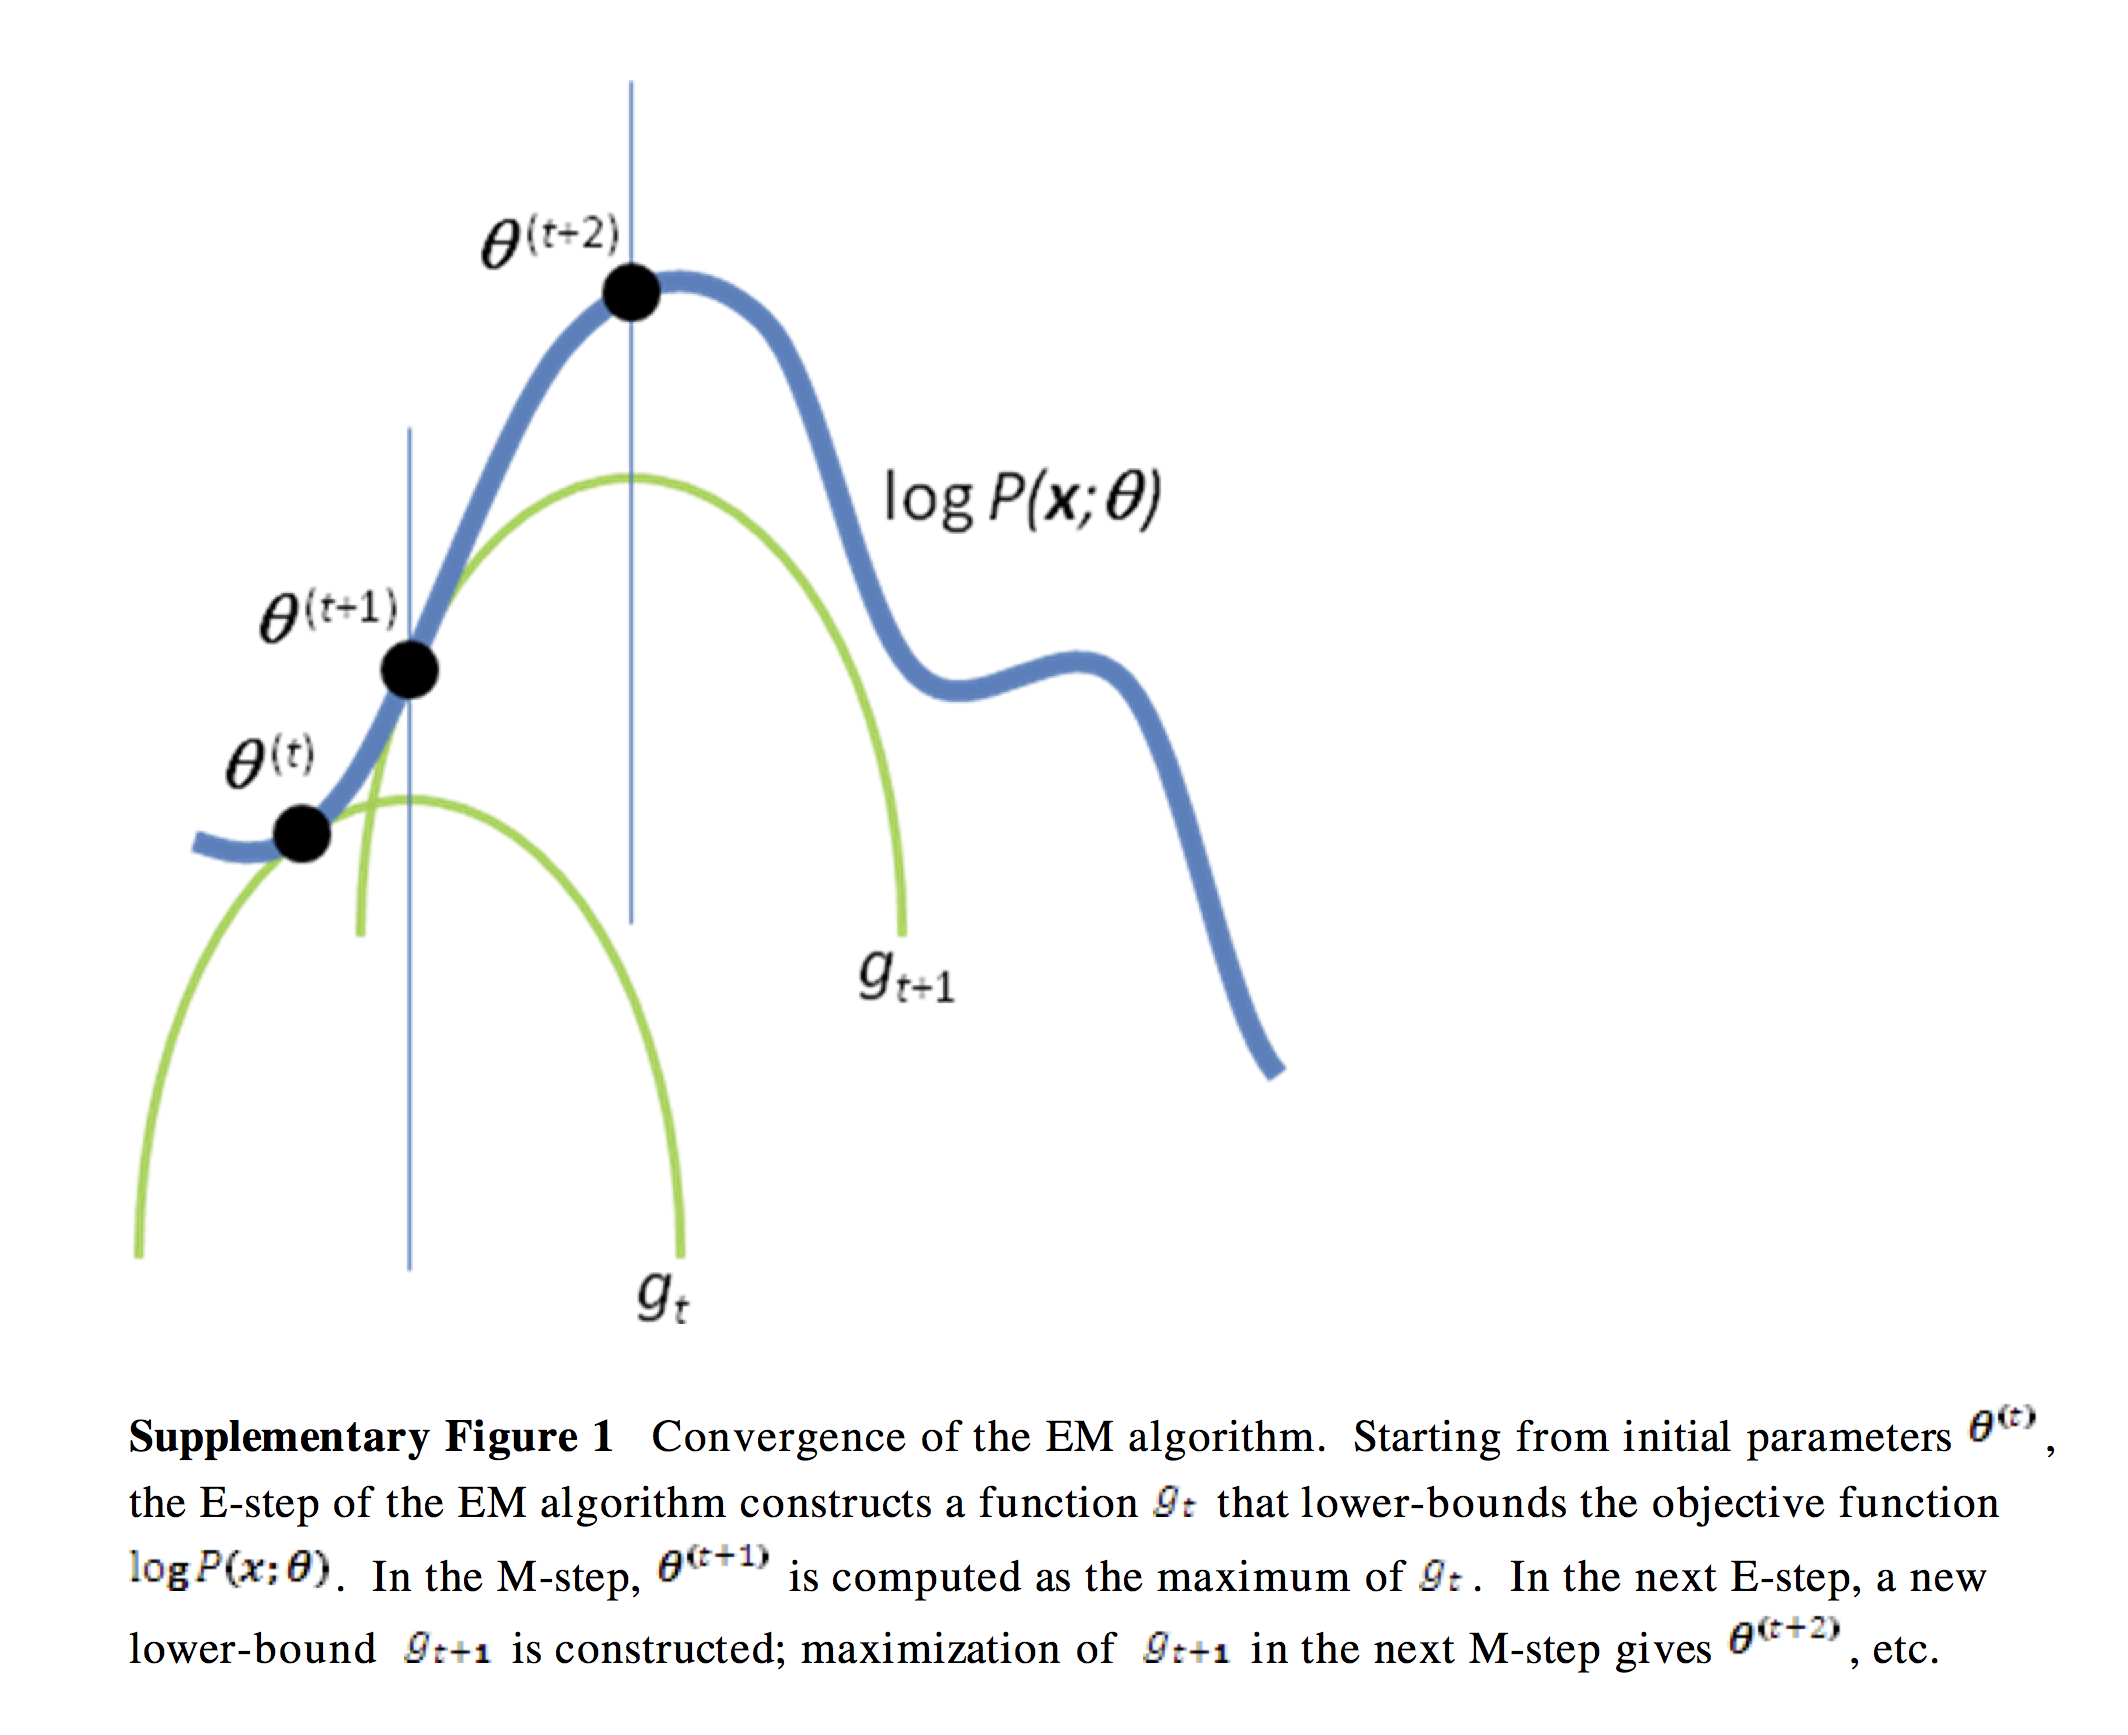
figure credit: https://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html

# Model Persistance

In [11]:
# example from sklearn
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)  

import pickle
with open("tmp_result.pkl","wb") as f:
    pickle.dump(clf, f)
with open("tmp_result.pkl","rb") as f:
    clf2 = pickle.load(f)
print clf2.predict(X[0:1])

[0]


In [13]:
##Another way
from sklearn.externals import joblib
joblib.dump(clf, 'filename.pkl') 
clf = joblib.load('filename.pkl')